# Matheus Araujo Pinheiro
# Katlyn Ribeiro

In [1]:
# Imports de bibliotecas necessárias:
import matplotlib.pyplot as plt

# Bloco 1: Funções de Suporte e Plotagem

In [2]:
# Função para plotar um pixel no gráfico
def plotar_pixel(x, y, cor, ax):
    ax.scatter(x, y, color=cor, s=100, zorder=3)

# Bloco 2: Algoritmo Completo do Ponto-Médio

In [3]:
def algoritmo_ponto_medio(x1, y1, x2, y2, ax):
    """
    Args:
        x1 (int): Coordenada X do ponto inicial.
        y1 (int): Coordenada Y do ponto inicial.
        x2 (int): Coordenada X do ponto final.
        y2 (int): Coordenada Y do ponto final.
        ax (matplotlib.axes.Axes): O objeto Axes para plotar os pixels.

    Returns:
        list: Uma lista de tuplas com as coordenadas (x, y) de cada pixel plotado.
    """
    
    # Lista para armazenar os pontos
    points = []

    # Plota o ponto inicial em verde
    plotar_pixel(x1, y1, 'green', ax)
    points.append((x1, y1))

    # Calcula as diferenças e os sinais de incremento
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1

    # Tratamento de casos especiais (linhas paralelas aos eixos)
    if dx == 0:  # Linha vertical
        for y in range(y1 + sy, y2 + sy, sy):
            plotar_pixel(x1, y, 'red', ax)
            points.append((x1, y))
        return points
    
    if dy == 0:  # Linha horizontal
        for x in range(x1 + sx, x2 + sx, sx):
            plotar_pixel(x, y1, 'red', ax)
            points.append((x, y1))
        return points

    # Algoritmo do Ponto Médio para os demais casos

    # Checa se a iteração será no eixo X ou Y
    if dy <= dx:  # Itera sobre X (slope <= 1)
        d = 2 * dy - dx
        inc_E = 2 * dy
        inc_NE = 2 * (dy - dx)
        x, y = x1, y1

        while x != x2:
            x += sx
            if d < 0:
                d += inc_E
            else:
                y += sy
                d += inc_NE
            plotar_pixel(x, y, 'red', ax)
            points.append((x, y))
            
    # Itera sobre Y (slope > 1)
    else:
        d = 2 * dx - dy
        inc_E = 2 * dx
        inc_NE = 2 * (dx - dy)
        x, y = x1, y1

        while y != y2:
            y += sy
            if d < 0:
                d += inc_E
            else:
                x += sx
                d += inc_NE
            plotar_pixel(x, y, 'red', ax)
            points.append((x, y))

    return points

# Bloco 3: Função Principal para Execução e Visualização

In [4]:
def plottar_exemplos():
    """
    Configura e plota diversos exemplos de linhas usando o algoritmo do ponto médio.
    Cada exemplo é exibido em um gráfico separado.
    """
    # Exemplos para testar todos os octantes e casos especiais
    exemplos = [
        (5, 8, 9, 11),  # Exemplo 1: 0 < m < 1 (primeiro octante)
        (2, 2, 8, 12),  # Exemplo 2: m > 1
        (12, 10, 5, 15), # Exemplo 3: m < 0
        (2, 10, 10, 2),  # Exemplo 4: m < 0 (slope = -1)
        (2, 2, 12, 2),  # Exemplo 5: Linha horizontal
        (2, 2, 2, 12),  # Exemplo 6: Linha vertical
        (5, 5, 10, 10),  # Exemplo 7: Linha diagonal m = 1
        (10, 10, 5, 5),  # Exemplo 8: Linha diagonal m = 1 (inversa)
    ]

    for i, (x1, y1, x2, y2) in enumerate(exemplos):
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title(f'Exemplo {i+1}: ({x1},{y1}) até ({x2},{y2})', fontsize=15)
        ax.set_xlabel('X', fontsize=12)
        ax.set_ylabel('Y', fontsize=12)
        ax.grid(True, which='both', linestyle=':', alpha=0.5)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)

        # Plota a linha de referência para comparação
        ax.plot([x1, x2], [y1, y2], 'b--', linewidth=2, label='Linha de Referência', zorder=1)

        # Chama a função do algoritmo do ponto médio
        points = algoritmo_ponto_medio(x1, y1, x2, y2, ax)

        # Ajusta os limites do gráfico dinamicamente
        all_x = [p[0] for p in points] + [x1, x2]
        all_y = [p[1] for p in points] + [y1, y2]
        if all_x and all_y:
            margin_x = (max(all_x) - min(all_x)) * 0.1
            margin_y = (max(all_y) - min(all_y)) * 0.1
            ax.set_xlim(min(all_x) - max(1, margin_x), max(all_x) + max(1, margin_x))
            ax.set_ylim(min(all_y) - max(1, margin_y), max(all_y) + max(1, margin_y))

        # Adiciona a legenda e exibe o gráfico
        ax.legend(fontsize=12)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

# Bloco de Execução

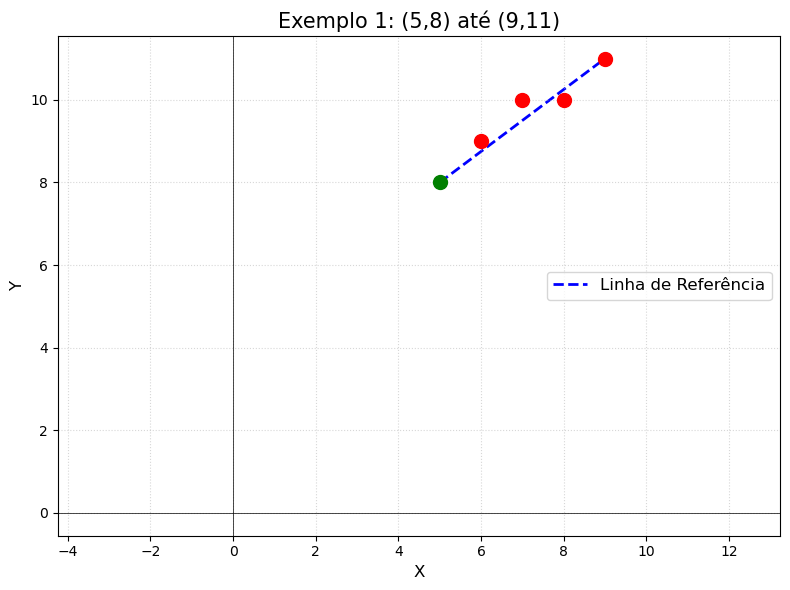

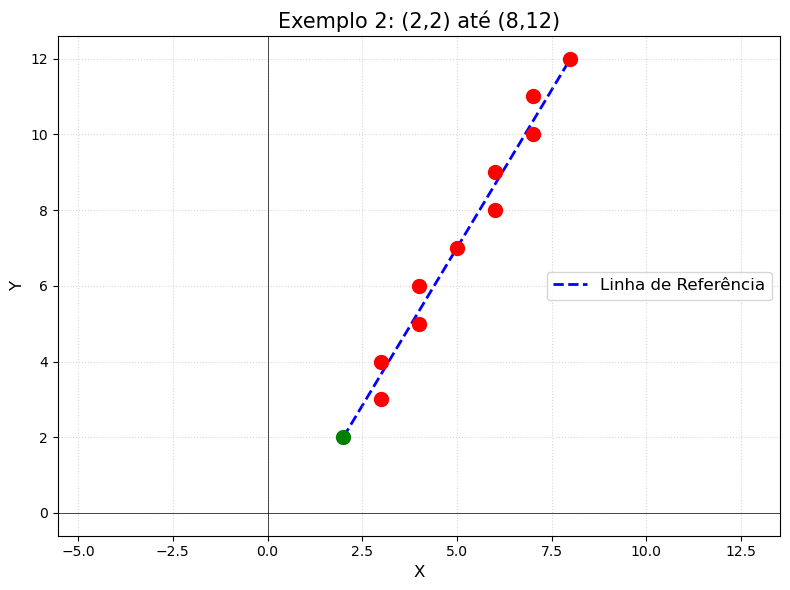

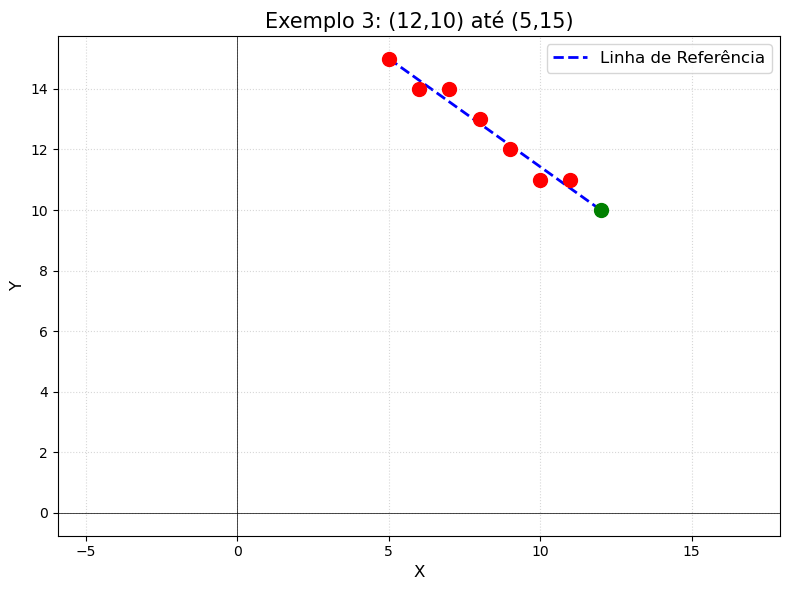

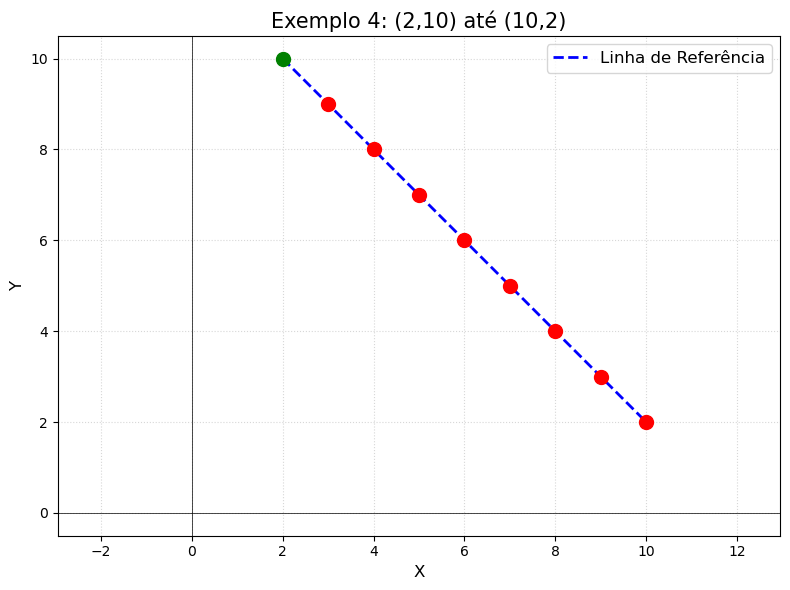

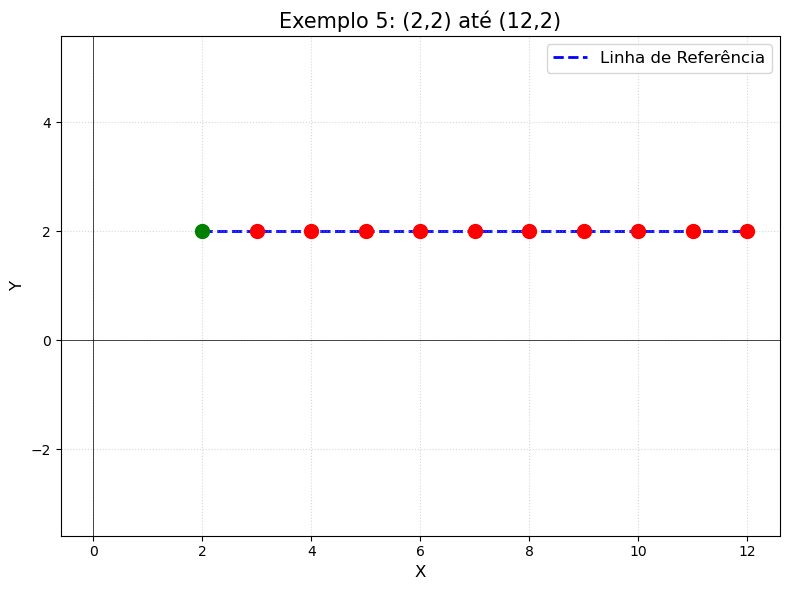

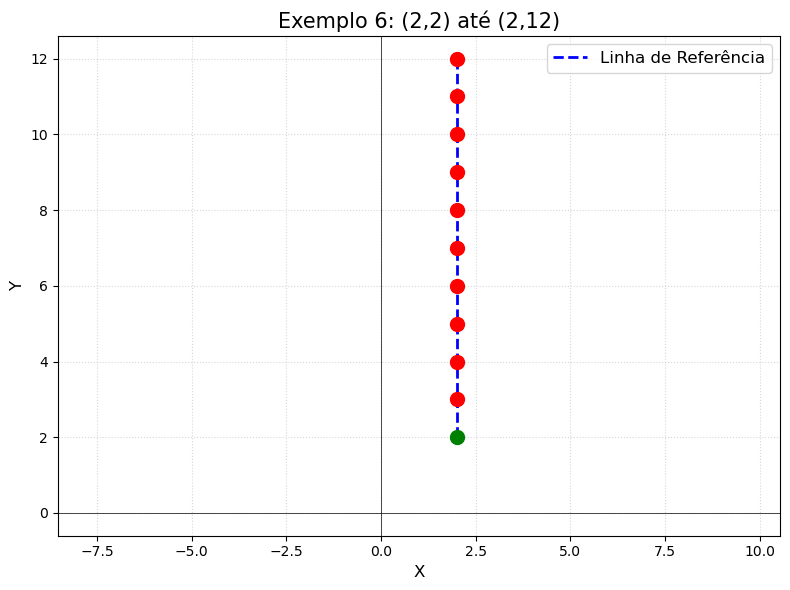

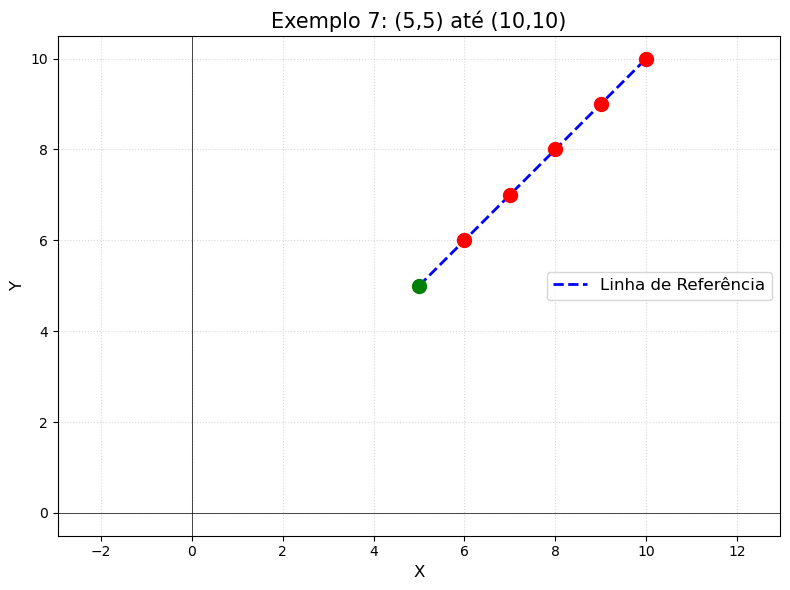

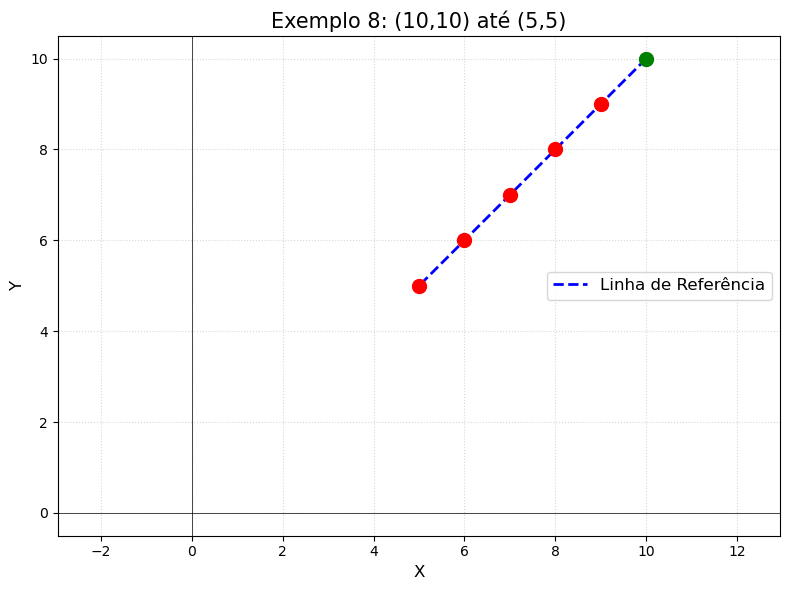

In [5]:
# Executa a função principal para mostrar os exemplos do Exercício 1 – Estender o Algoritmo do Ponto-Médio
plottar_exemplos()